# The evolution of homophily (SI)

## Initialization

In [1]:
# import modules
import numpy as np
import pandas as pd
import time
from sympy import *
from sympy.abc import i, j, k, l, r, N, n, m 
## compress warnings
import warnings
warnings.filterwarnings('ignore')

## Symbolic Calculation

In [16]:
N, n, m = symbols('N, n, m', integer = True, positive = True) # population size # strategy size # phenotype size
beta = symbols('beta', positive = True) # selection strength
u, mu, v, nu = symbols('u, mu, v, nu', positive = True) # mutation probability # mutation rate
t, tau = symbols('t, tau', real = True) # time

a, b = symbols('a, b', real = True)
p, q = symbols('p, q', real = True) # preference probability
x = MatrixSymbol('x', n, 1) # frequency vector # x_i is the the frequency of players using preference p_i
A = MatrixSymbol('A', n, n) # payoff matrix
Q = MatrixSymbol('Q', n, n) # interaction matrix 

init_printing(use_unicode = True) # for a good presentation of mathematics

In [3]:
# mu = N*u
# nu = N*v
# x = MatrixSymbol('x', n, m) # frequency matrix # x_i^l is the frequency of players using preference p_i with phenotype l

## Abundance

In [4]:
X = hadamard_product(FunctionMatrix(n, 1, Lambda((i, j), N)), x)
pi = FunctionMatrix(n, 1, Lambda((k, i), Sum(A[k, j]*Q[k, j], (j, 0, n - 1))))
pi = FunctionMatrix(n, 1, Lambda((k, i), pi[k, 0]/X[k, 0])) # payoff vector
f = OneMatrix(n, 1) + hadamard_product(FunctionMatrix(n, 1, Lambda((k, i), beta)), pi) # fitness vector
F = Sum(X[i, 0]*f[i, 0], (i, 0, n - 1))
F = simplify(F)

In [5]:
w_k = 1 - 1/N + f[k, 0]/F
x_sel_k = X[k, 0]*w_k - X[k, 0]
x_sel_k /= N
x_sel_k = simplify(factor(cancel(simplify(x_sel_k))))

### 🌷🌷🌷 equation (9) & (10) 🌷🌷🌷

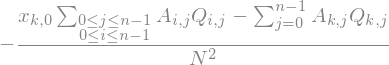

In [6]:
factor(x_sel_k.subs(beta, 0)) # equals 0
factor(diff(x_sel_k, beta).subs(beta, 0).subs(Sum(x[i, 0], (i, 0, n - 1)), 1)) 

### 🍨🍨🍨 Discrete 🍨🍨🍨

### The preference $p_k$ is favored by natural selection if

> ####

\begin{align}
(\ast) &= \sum_{j}a_{kj}\langle q_{kj} \rangle - \sum_{i}\sum_{j}a_{ij}\langle x_kq_{ij} \rangle \\
&= a_{kk}\langle q_{11} \rangle + \sum_{j \neq k}a_{kj}\langle q_{12} \rangle 
- a_{kk}\langle x_1q_{11} \rangle - \sum_{i\neq k}a_{ii}\langle x_1q_{22} \rangle
- \sum_{j \neq k}a_{kj}\langle x_1q_{12} \rangle - \sum_{i \neq k}a_{ik}\langle x_2q_{12} \rangle
- \sum_{i \neq j \neq k \neq i}a_{ij}\langle x_1q_{23} \rangle \\
&= a_{kk}\langle q_{11} \rangle + \left(\sum_{j}a_{kj} - a_{kk}\right)\langle q_{12} \rangle
- a_{kk}\langle x_1q_{11} \rangle - \left(\sum_{i}a_{ii} - a_{kk}\right)\langle x_1q_{22} \rangle
- \left(\sum_{j}a_{kj} - a_{kk}\right)\langle x_1q_{12} \rangle - \left(\sum_{i}a_{ik} - a_{kk}\right)\langle x_2q_{12} \rangle \\
&- \left(\sum_{i, j}a_{ij} - \sum_{i}a_{ii} - \sum_{j}a_{kj} - \sum_{i}a_{ik} + 2a_{kk}\right)\langle x_1q_{23} \rangle \\
& > 0
\end{align}

or equivalently
> ####

\begin{align}
(\ast) &= a_{kk}\left(\langle q_{11} \rangle - \langle q_{12} \rangle - \langle x_1q_{11} \rangle + \langle x_1q_{22} \rangle + \langle x_1q_{12} \rangle + \langle x_2q_{12} \rangle - 2\langle x_1q_{23} \rangle \right) \\
&+ \frac{\sum_{i}a_{ii}}{n}\left[n\left(\langle x_1q_{23} \rangle - \langle x_1q_{22} \rangle \right)\right] \\
&+ \frac{\sum_{j}a_{kj}}{n}\left[n\left(\langle q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_1q_{12} \rangle \right)\right] \\
&+ \frac{\sum_{i}a_{ik}}{n}\left[n\left(\langle x_1q_{23} \rangle - \langle x_2q_{12} \rangle \right)\right] \\
&+ \frac{\sum_{i, j}a_{ij}}{n^2}\left(-n^2\langle x_1q_{23} \rangle \right)
\end{align}

define 

> #### $a_{ij}^S = ap_ip_j \qquad a_{ij}^D = b(1 - p_i)(1 - p_j)$

* #### $\pi_{kk} = a_{kk} \qquad \bar{\pi}_{\ast\ast} = \frac{\sum_{i}a_{ii}}{n} 
\qquad \bar{\pi}_{k\ast} = \frac{\sum_{j}a_{kj}}{n} \qquad \bar{\pi}_{\ast k} = \frac{\sum_{i}a_{ik}}{n}
\qquad \bar{\pi} = \frac{\sum_{i, j}a_{ij}}{n^2}$
* ##### $c_{kk} = \langle q_{11} \rangle - \langle q_{12} \rangle - \langle x_1q_{11} \rangle + \langle x_1q_{22} \rangle + \langle x_1q_{12} \rangle + \langle x_2q_{12} \rangle - 2\langle x_1q_{23} \rangle$
* ##### $c_{\ast\ast} = n\left(\langle x_1q_{23} \rangle - \langle x_1q_{22} \rangle \right)$
* ##### $c_{k\ast} = n\left(\langle q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_1q_{12} \rangle \right)$
* ##### $c_{\ast k} = n\left(\langle x_1q_{23} \rangle - \langle x_2q_{12} \rangle \right)$
* ##### $c = -n^2\langle x_1q_{23} \rangle$

and equivalently
> #### $(\ast) = c_{kk}\pi_{kk} + c_{\ast\ast}\bar{\pi}_{\ast\ast} + c_{k\ast}\bar{\pi}_{k\ast} + c_{\ast k}\bar{\pi}_{\ast k} + c\bar{\pi}$

### The coefficients satisfy

>
*
\begin{align}
c_{kk} + c_{\ast\ast} &=  \langle q_{11} \rangle - \langle q_{12} \rangle - \langle x_1q_{11} \rangle + \langle x_1q_{22} \rangle + \langle x_1q_{12} \rangle + \langle x_2q_{12} \rangle - 2\langle x_1q_{23} \rangle + n\left(\langle x_1q_{23} \rangle - \langle x_1q_{22} \rangle \right) \\
&= \langle \sum_{i}x_{i}q_{11} \rangle - \langle \sum_{i}x_{i}q_{12} \rangle - \langle x_1q_{11} \rangle + \langle x_1q_{22} \rangle + \langle x_1q_{12} \rangle + \langle x_2q_{12} \rangle - 2\langle x_1q_{23} \rangle + n\left(\langle x_1q_{23} \rangle - \langle x_1q_{22} \rangle \right) \\
&= \langle x_{1}q_{11} \rangle + (n - 1)\langle x_{1}q_{22} \rangle - \langle x_{1}q_{12} \rangle - \langle x_{2}q_{12} \rangle - (n - 2)\langle x_{1}q_{23} \rangle \\
&- \langle x_1q_{11} \rangle + \langle x_1q_{22} \rangle + \langle x_1q_{12} \rangle + \langle x_2q_{12} \rangle - 2\langle x_1q_{23} \rangle + n\left(\langle x_1q_{23} \rangle - \langle x_1q_{22} \rangle \right) \\
&= 0
\end{align}
*
\begin{align}
c_{k\ast} + c_{\ast k} + c &= n\left(\langle q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_1q_{12} \rangle \right) + n\left(\langle x_1q_{23} \rangle - \langle x_2q_{12} \rangle \right) -n^2\langle x_1q_{23} \rangle \\
&= n\left(\langle q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_1q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_2q_{12} \rangle - n\langle x_1q_{23} \rangle \right) \\
&= n\left(\langle \sum_{i}x_{i}q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_1q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_2q_{12} \rangle - n\langle x_1q_{23} \rangle \right) \\
&= n\left(\langle x_{1}q_{12} \rangle + \langle x_{2}q_{12} \rangle + (n - 2)\langle x_{1}q_{23} \rangle + \langle x_1q_{23} \rangle - \langle x_1q_{12} \rangle + \langle x_1q_{23} \rangle - \langle x_2q_{12} \rangle - n\langle x_1q_{23} \rangle \right) \\
&= 0
\end{align}

let

* ##### $\lambda_1 = c_{\ast\ast} \propto \langle x_1q_{22} \rangle - \langle x_1q_{23} \rangle$
* ##### $\lambda_2 = -c_{\ast k} \propto \langle x_2q_{12} \rangle - \langle x_1q_{23} \rangle $
* ##### $\lambda_3 = -c \propto n\langle x_1q_{23} \rangle$

and equivalently

> #### $(\ast) = \lambda_1\left(\pi_{kk} - \bar{\pi}_{\ast\ast}\right) + \lambda_2\left(\bar{\pi}_{k\ast} - \bar{\pi}_{\ast k}\right) + \lambda_3\left(\bar{\pi}_{k\ast}  - \bar{\pi}\right)$


### The preference selction condition for $p_k$ is 

> ####
> \begin{align}
(\ast) &= (\ast)^{S} + (\ast)^{D} \\
&= \lambda_1^{S}\left(\pi_{kk}^{S} - \bar{\pi}_{\ast\ast}^{S}\right) + \lambda_2^{S}\left(\bar{\pi}_{k\ast}^{S} - \bar{\pi}_{\ast k}^{S}\right) + \lambda_3^{S}\left(\bar{\pi}_{k\ast}^{S}  - \bar{\pi}^{S}\right) \\
&+ \lambda_1^{D}\left(\pi_{kk}^{D} - \bar{\pi}_{\ast\ast}^{D}\right) + \lambda_2^{D}\left(\bar{\pi}_{k\ast}^{D} - \bar{\pi}_{\ast k}^{D}\right) + \lambda_3^{D}\left(\bar{\pi}_{k\ast}^{D}  - \bar{\pi}^{D}\right) \\
&> 0
\end{align}

where 

#### 🌿🌿🌿 same phenotype 🌿🌿🌿 

* ##### $\lambda_1^{S} \propto \langle x_1q_{22}^{S} \rangle - \langle x_1q_{23}^{S} \rangle 
\propto \langle x_1\sum_{l = 1}^mx_2^lx_2^l \rangle - \langle x_1\sum_{l = 1}^mx_2^lx_3^l \rangle$
* ##### $\lambda_2^{S} \propto \langle x_2q_{12}^{S} \rangle - \langle x_1q_{23}^{S} \rangle 
\propto \langle x_2\sum_{l = 1}^mx_1^lx_2^l \rangle - \langle x_1\sum_{l = 1}^mx_2^lx_3^l \rangle
= \langle x_1\sum_{l = 1}^mx_1^lx_2^l \rangle - \langle x_1\sum_{l = 1}^mx_2^lx_3^l \rangle$
* ##### $\lambda_3^{S} \propto n\langle x_1q_{23}^{S} \rangle 
\propto n\langle x_1\sum_{l = 1}^mx_2^lx_3^l \rangle$

and 

#### 🌿🌿🌿 different phenotype 🌿🌿🌿 

* ##### $\lambda_1^{D} \propto \langle x_1q_{22}^{D} \rangle - \langle x_1q_{23}^{D} \rangle 
\propto \langle x_1\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_2^lx_2^r \rangle - \langle x_1\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_2^lx_3^r \rangle$
* ##### $\lambda_2^{D} \propto \langle x_2q_{12}^{D} \rangle - \langle x_1q_{23}^{D} \rangle 
\propto \langle x_2\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_1^lx_2^r \rangle - \langle x_1\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_2^lx_3^r \rangle
= \langle x_1\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_1^lx_2^r \rangle - \langle x_1\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_2^lx_3^r \rangle$
* ##### $\lambda_3^{D} \propto n\langle x_1q_{23}^{D} \rangle 
\propto n\langle x_1\sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m}x_2^lx_3^r \rangle$

## Correlation

* ### one individual

___

\begin{align}
\langle \sum_{l = 1}^{m} x_1^l \rangle &= \langle x_1 \rangle = \frac{1}{n} \\
\langle \sum_{i = 1}^{n} x_i^l \rangle &= \langle x_{\ast}^l \rangle
\end{align}

* ### two individuals
    
___

* probability distribution function of coalescence time: $f_2(\tau_2)$

* probability of having the same preference: $s_2(\tau_2)$

* probability of having the same phenotype: $g_2(\tau_2)$

* probability of having a different phenotype: $h_2(\tau_2)$

> #### $f_2(\tau) = e^{-\tau} \qquad s_2(\tau) = e^{-\mu\tau} + \frac{1 - e^{-\mu\tau}}{n} \qquad g_2(\tau) = e^{-\nu\tau} + \frac{1 - e^{-\nu\tau}}{m} \qquad h_2(\tau) = \frac{(m - 1)(1 - e^{-\nu\tau})}{m}$

#### 🌿🌿🌿 same phenotype 🌿🌿🌿 

hence

\begin{align}
\langle \sum_{l = 1}^m x_1^lx_{\ast}^l \rangle &= \frac{1}{n}\int_{0}^{+\infty}g_2(\tau)f_2(\tau)d\tau \\
\langle \sum_{l = 1}^m x_1^lx_1^l \rangle &= \frac{1}{n}\int_{0}^{+\infty}s_2(\tau)g_2(\tau)f_2(\tau)d\tau \\
\end{align}

further

\begin{align}
\langle \sum_{l = 1}^m x_1^lx_2^l \rangle &=  \frac{1}{n - 1}\left(\langle \sum_{l = 1}^m x_1^lx_{\ast}^l \rangle - \langle \sum_{l = 1}^m x_1^lx_1^l \rangle\right)
\end{align}

#### 🌿🌿🌿 different phenotype 🌿🌿🌿 

hence

\begin{align}
\langle \sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m} x_1^lx_1^r \rangle &= \frac{1}{n}\int_{0}^{+\infty}s_2(\tau)h_2(\tau)f_2(\tau)d\tau \\
\langle \sum_{l = 1}^m\sum_{r = 1, r \neq l}^{m} x_1^lx_2^r \rangle &= \frac{1}{n(n - 1)}\int_{0}^{+\infty}\left[1 - s_2(\tau)\right]h_2(\tau)f_2(\tau)d\tau
\end{align}

In [7]:
f_2 = exp(-tau)
s_2 = exp(-mu*tau) + (1 - exp(-mu*tau))/n
g_2 = s_2.subs({n:m, mu: nu})
h_2 = 1 - g_2

### 🌷 equation (35) & (38) 🌷

In [8]:
x_20 = 1/n*factor(integrate(g_2*f_2, (tau, 0, oo))) # equation ( )
x_21 = 1/n*factor(integrate(s_2*g_2*f_2, (tau, 0, oo))) # equation (35)
x_22 = 1/(n - 1)*(x_20 - x_21) # equation (38)

### 🌷 equation (43) & (46) 🌷

In [9]:
y_21 = 1/n*factor(integrate(s_2*h_2*f_2, (tau, 0, oo))) # equation (43)
y_22 = 1/(n*(n - 1))*factor(integrate((1 - s_2)*h_2*f_2, (tau, 0, oo))) # equation (46)

* ### three individuals
    
___

* probability distribution function of coalescence time: $f_3(\tau_2, \tau_3)$

* probability of having the same preference: $s_3(\tau_2, \tau_3)$

> #### $f_3(t, \tau) = e^{-t}(3e^{-3\tau})$
> #### $s_3(t, \tau) = \frac{s_2(t)}{n^2}\left[1 + 3(n - 1)e^{-\mu\tau} + (n - 1)(n - 2)e^{-3\mu\tau/2}\right] + \frac{1 - s_2(t)}{n^2}\left[1 + (n - 3)e^{-\mu\tau} - (n - 2)e^{-3\mu\tau/2}\right]$


#### 🌿🌿🌿 same phenotype 🌿🌿🌿 


hence

\begin{align}
\langle x_1\sum_{l = 1}^m x_1^lx_{\ast}^l \rangle &= \frac{1}{3n}\int_{0}^{+\infty}\int_{0}^{+\infty}\left[s_2(\tau)g_2(t + \tau) + s_2(t + \tau)g_2(\tau) + s_2(t + \tau)g_2(t + \tau)\right]f_3(t, \tau)d\tau dt \\
\langle x_1\sum_{l = 1}^m x_1^lx_1^l \rangle &= \frac{1}{3n}\int_{0}^{+\infty}\int_{0}^{+\infty} s_3(t, \tau)\left[g_2(t + \tau) + g_2(\tau) + g_2(t + \tau)\right]f_3(t, \tau)d\tau dt 
\end{align}

further

\begin{align}
\langle x_1\sum_{l = 1}^m x_1^lx_2^l \rangle &= \frac{1}{n - 1}\left(\langle x_1\sum_{l = 1}^m x_1^lx_{\ast}^l \rangle - \langle x_1\sum_{l = 1}^m x_1^lx_1^l \rangle\right) \\
\langle x_1\sum_{l = 1}^m x_2^lx_2^l \rangle &= \frac{1}{n - 1}\left(\langle \sum_{l = 1}^m x_1^lx_1^l \rangle - \langle x_1\sum_{l = 1}^m x_1^lx_1^l \rangle\right) \\
\langle x_1\sum_{l = 1}^m x_2^lx_3^l \rangle &= \frac{1}{n - 2}\left(\langle \sum_{l = 1}^m x_1^lx_2^l \rangle - \langle x_1\sum_{l = 1}^m x_1^lx_2^l \rangle\right)
\end{align}


#### 🌿🌿🌿 different phenotype 🌿🌿🌿 

\begin{align}
\langle x_1\sum_{l = 1}^m x_1^lx_{\ast}^r \rangle &= \frac{1}{3n}\int_{0}^{+\infty}\int_{0}^{+\infty}\left[s_2(\tau)h_2(t + \tau) + s_2(t + \tau)h_2(\tau) + s_2(t + \tau)h_2(t + \tau)\right]f_3(t, \tau)d\tau dt \\
\langle x_1\sum_{l = 1}^m x_1^lx_1^r \rangle &= \frac{1}{3n}\int_{0}^{+\infty}\int_{0}^{+\infty} s_3(t, \tau)\left[h_2(t + \tau) + h_2(\tau) + h_2(t + \tau)\right]f_3(t, \tau)d\tau dt 
\end{align}

further


\begin{align}
\langle x_1\sum_{l = 1}^m x_1^lx_2^r \rangle &= \frac{1}{n - 1}\left(\langle x_1\sum_{l = 1}^m x_1^lx_{\ast}^r \rangle - \langle x_1\sum_{l = 1}^m x_1^lx_1^r \rangle\right) \\
\langle x_1\sum_{l = 1}^m x_2^lx_2^r \rangle &= \frac{1}{n - 1}\left(\langle \sum_{l = 1}^m x_1^lx_1^r \rangle - \langle x_1\sum_{l = 1}^m x_1^lx_1^r \rangle\right) \\
\langle x_1\sum_{l = 1}^m x_2^lx_3^r \rangle &= \frac{1}{n - 2}\left(\langle \sum_{l = 1}^m x_1^lx_2^r \rangle - \langle x_1\sum_{l = 1}^m x_1^lx_2^r \rangle\right)
\end{align}

In [10]:
f_3 = 3*exp(-3*tau)*exp(-t)
s_3_ast = 1/n**2*(1 + 3*(n - 1)*exp(-mu*tau) + (n - 1)*(n - 2)*exp(-3*mu*tau/2))
s_3_astast = 1/n**2*(1 + (n - 3)*exp(-mu*tau) - (n - 2)*exp(-3*mu*tau/2))
s_3 = s_2.subs({tau: t})*s_3_ast + (1 - s_2.subs({tau: t}))*s_3_astast

### 🌷 equation (36) - (37) & (39) - (41) 🌷

In [11]:
integrand_30 = (s_2*g_2.subs({tau: t + tau}) + s_2.subs({tau: t + tau})*g_2 + s_2.subs({tau: t + tau})*g_2.subs({tau: t + tau}))*f_3
x_30 = 1/(3*n)*factor(integrate(integrate(integrand_30, (tau, 0, oo)), (t, 0, oo))) # equation (37)
integrand_31 = s_3*(g_2.subs({tau: t + tau}) + g_2 + g_2.subs({tau: t + tau}))*f_3
x_31 = 1/(3*n)*factor(integrate(integrate(integrand_31, (tau, 0, oo)), (t, 0, oo))) # equation (36)
x_32 = 1/(n - 1)*factor(x_30 - x_31) # equation (39)
x_33 = 1/(n - 1)*factor(x_21 - x_31) # equation (41)
x_34 = 1/(n - 2)*factor(x_22 - 2*x_32) # equation (40)

### 🌷 equation (50) - (52) 🌷

In [12]:
dummy = m*n**2*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6)/mu
lambda_1 = simplify(factor(x_33 - x_34)*dummy)
lambda_2 = simplify(factor(x_32 - x_34)*dummy)
lambda_3 = factor(n*x_34*dummy)

### 🌷 equation (44) - (45) & (47) - (49) 🌷

In [13]:
integrand_30 = (s_2*h_2.subs({tau: t + tau}) + s_2.subs({tau: t + tau})*h_2 + s_2.subs({tau: t + tau})*h_2.subs({tau: t + tau}))*f_3
y_30 = 1/(3*n)*factor(integrate(integrate(integrand_30, (tau, 0, oo)), (t, 0, oo))) # equation (45)
integrand_31 = s_3*(h_2.subs({tau: t + tau}) + h_2 + h_2.subs({tau: t + tau}))*f_3
y_31 = 1/(3*n)*factor(integrate(integrate(integrand_31, (tau, 0, oo)), (t, 0, oo))) # equation (44)
y_32 = 1/(n - 1)*factor(y_30 - y_31) # equation (47)
y_33 = 1/(n - 1)*factor(y_21 - y_31) # equation (49)
y_34 = 1/(n - 2)*factor(y_22 - 2*y_32) # equation (48)

In [14]:
dummy = m*n**2*(mu + 1)*(mu + 2)*(nu + 1)*(mu + nu + 1)*(mu + nu + 3)*(3*mu + 2*nu + 6)/mu
kappa_1 = simplify(factor(y_33 - y_34)*dummy)
kappa_2 = simplify(factor(y_32 - y_34)*dummy)
kappa_3 = factor(n*y_34*dummy)

### 🍨🍨🍨 Continuous 🍨🍨🍨

### The preference $p$ is favored by natural selection if

> ####

\begin{equation}
(\ast) > 0
\end{equation}

define 

> #### $a(p, q)^S = apq \qquad a(p, q)^D = b(1 - p)(1 - q)$

* #### $\pi_{pp} = a(p, p) \qquad \bar{\pi}_{\ast\ast} = \int_{0}^{1}a(q, q)dq
\qquad \bar{\pi}_{p\ast} = \int_{0}^{1}a(p, q)dq \qquad \bar{\pi}_{\ast p} = \int_{0}^{1}a(q, p)dq
\qquad \bar{\pi} = \int_{0}^{1}\int_{0}^{1}a(p, q)dqdp$

### The preference selction condition for $p$ is 

> ####
> \begin{align}
(\ast) &= (\ast)^{S} + (\ast)^{D} \\
&= \lambda_1^{S}\left(ap^2 - \int_{0}^{1}aq^2dq\right) + \lambda_2^{S}\left(\int_{0}^{1}apqdq - \int_{0}^{1}aqpdq\right) + \lambda_3^{S}\left(\int_{0}^{1}apqdq  - \int_{0}^{1}\int_{0}^{1}apqdqdp\right) \\
&+ \lambda_1^{D}\left[b(1 - p)^2 - \int_{0}^{1}b(1 - q)^2dq\right] \\
&+ \lambda_2^{D}\left[\int_{0}^{1}b(1 - p)(1 - q)dq - \int_{0}^{1}b(1 - q)(1 - p)dq\right] \\
&+ \lambda_3^{D}\left[\int_{0}^{1}b(1 - p)(1 - q)dq - \int_{0}^{1}\int_{0}^{1}a(1 - p)(1 - q)dqdp\right] \\
&> 0
\end{align}

In [23]:
pi_a = a*p*q
pi_b = b*(1 - p)*(1 - q)

### 🌷 equation (56) - (57) 🌷

In [24]:
flag_a_1 = lambda_1*(pi_a.subs({q: p}) - integrate(pi_a.subs({p: q}), (q, 0, 1)))
flag_a_2 = lambda_2*(integrate(pi_a, (q, 0, 1)) - integrate(pi_a, (q, 0, 1)))
flag_a_3 = lambda_3*(integrate(pi_a, (q, 0, 1)) - integrate(integrate(pi_a, (q, 0, 1)), (p, 0, 1)))
flag_a = flag_a_1 + flag_a_2 + flag_a_3

flag_b_1 = kappa_1*(pi_b.subs({q: p}) - integrate(pi_b.subs({p: q}), (q, 0, 1)))
flag_b_2 = kappa_2*(integrate(pi_b, (q, 0, 1)) - integrate(pi_b, (q, 0, 1)))
flag_b_3 = kappa_3*(integrate(pi_b, (q, 0, 1)) - integrate(integrate(pi_b, (q, 0, 1)), (p, 0, 1)))
flag_b = flag_b_1 + flag_b_2 + flag_b_3

flag = collect(factor(flag_a + flag_b), p)

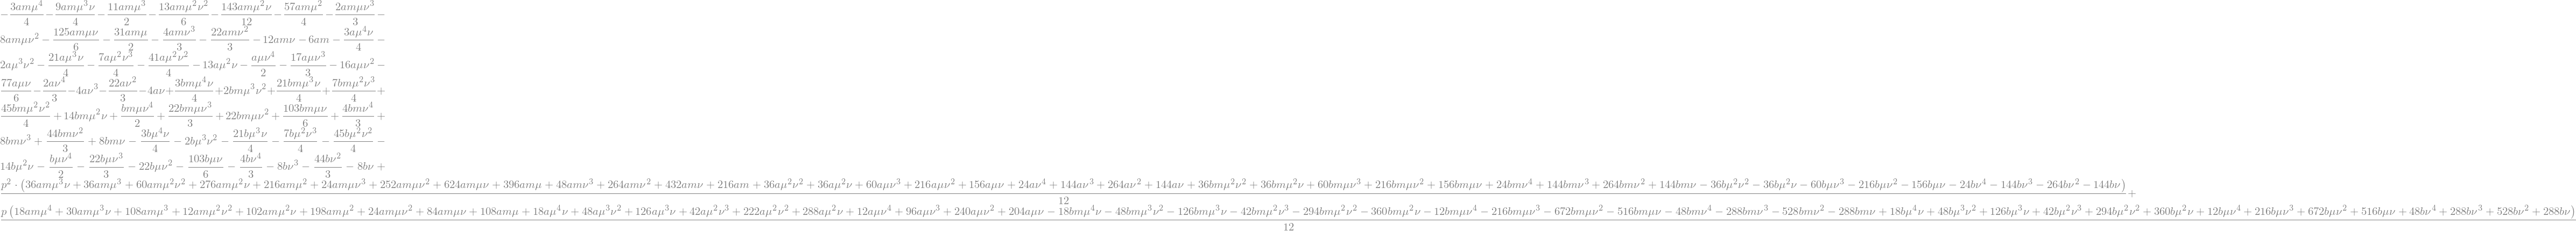

In [25]:
flag

### 🌷 equation (58) - (60) 🌷

In [40]:
flag_homo = factor(integrate(flag*p, (p, 0, 1)))
flag_homo = factor_list(flag_homo)[1][3][0]

In [42]:
collect(flag_homo, b)

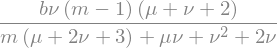

In [46]:
collect(factor(solve(flag_homo, a)[0]), m)